In [9]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

In [10]:
#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [11]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [12]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [13]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_6 (Activation)    (None, 512)              

In [15]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 76s 191ms/step - loss: 2.3185 - accuracy: 0.2680 - val_loss: 1.5447 - val_accuracy: 0.4456
Epoch 2/2
313/313 [==============================] - 56s 179ms/step - loss: 1.4574 - accuracy: 0.4863 - val_loss: 1.2989 - val_accuracy: 0.5482
Testing...
79/79 [==============================] - 3s 36ms/step - loss: 1.2821 - accuracy: 0.5488

Test score: 1.2820944786071777
Test accuracy: 0.548799991607666


In [16]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


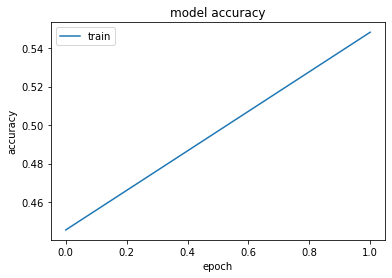

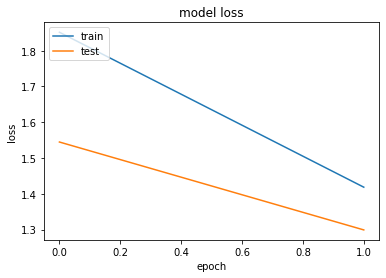

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Checking accuracy for different batch sizes**

In [18]:
#constant
BATCH_SIZE = 32
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_9 (Activation)    (None, 512)              

In [19]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
1250/1250 [==============================] - 118s 93ms/step - loss: 2.2086 - accuracy: 0.1751 - val_loss: 1.9764 - val_accuracy: 0.2946
Epoch 2/2
1250/1250 [==============================] - 112s 90ms/step - loss: 1.9665 - accuracy: 0.2984 - val_loss: 1.8324 - val_accuracy: 0.3466
Testing...
313/313 [==============================] - 3s 11ms/step - loss: 1.8157 - accuracy: 0.3543

Test score: 1.815670132637024
Test accuracy: 0.35429999232292175


In [20]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


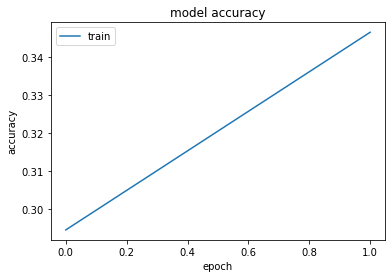

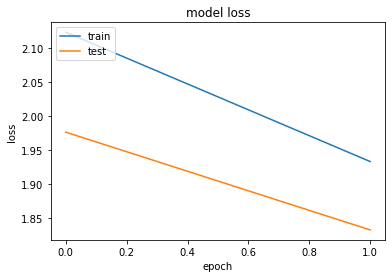

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#constant
BATCH_SIZE = 64
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_12 (Activation)   (None, 512)              

In [23]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
625/625 [==============================] - 85s 134ms/step - loss: 2.3030 - accuracy: 0.1017 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 2/2
625/625 [==============================] - 85s 136ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1016
Testing...
157/157 [==============================] - 3s 17ms/step - loss: 2.3026 - accuracy: 0.1000

Test score: 2.302642345428467
Test accuracy: 0.10000000149011612


In [24]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


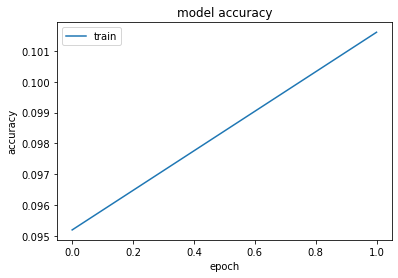

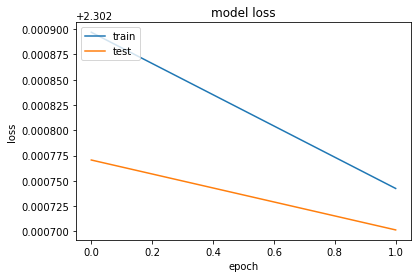

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
#constant
BATCH_SIZE = 256
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_15 (Activation)   (None, 512)              

In [27]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
157/157 [==============================] - 50s 312ms/step - loss: 2.3030 - accuracy: 0.0963 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 2/2
157/157 [==============================] - 50s 320ms/step - loss: 2.3026 - accuracy: 0.1062 - val_loss: 2.3026 - val_accuracy: 0.0977
Testing...
40/40 [==============================] - 3s 69ms/step - loss: 2.3026 - accuracy: 0.1000

Test score: 2.3026063442230225
Test accuracy: 0.10000000149011612


In [28]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


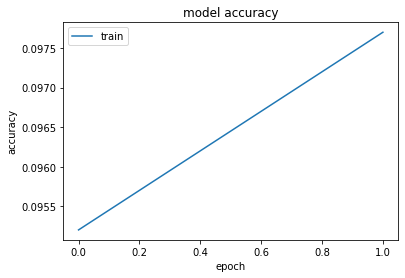

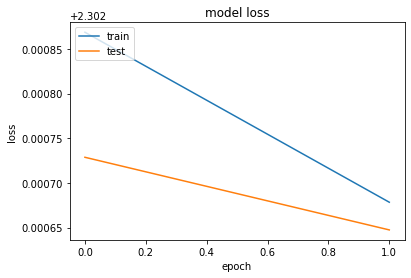

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* >**Batch size = 32  Accuracy = 35%**
* >**Batch size = 64  Accuracy = 10%**
* >**Batch size = 128 Accuracy = 54%**
* >**Batch size = 256 Accuracy = 10%**

**Checking accuracy for different epoch sizes**

In [30]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_18 (Activation)   (None, 512)              

In [31]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
313/313 [==============================] - 61s 187ms/step - loss: 2.3031 - accuracy: 0.0969 - val_loss: 2.3029 - val_accuracy: 0.0952
Epoch 2/10
313/313 [==============================] - 55s 177ms/step - loss: 2.3025 - accuracy: 0.1033 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 3/10
313/313 [==============================] - 54s 174ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 4/10
313/313 [==============================] - 55s 177ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/10
313/313 [==============================] - 52s 165ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 6/10
313/313 [==============================] - 54s 171ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 7/10
313/313 [==============================] - 52s 166ms/step - loss: 2.3026 - accuracy: 0.1036 - val_loss: 2.3027 - val_ac

In [32]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


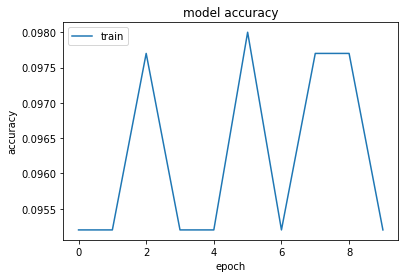

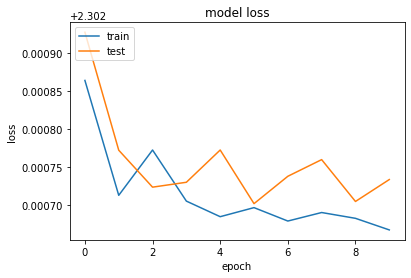

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_21 (Activation)   (None, 512)              

In [35]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
313/313 [==============================] - 52s 162ms/step - loss: 2.3030 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 2/20
313/313 [==============================] - 52s 165ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 3/20
313/313 [==============================] - 50s 160ms/step - loss: 2.3027 - accuracy: 0.0957 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/20
313/313 [==============================] - 50s 159ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/20
313/313 [==============================] - 52s 166ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 6/20
313/313 [==============================] - 50s 159ms/step - loss: 2.3026 - accuracy: 0.1024 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/20
313/313 [==============================] - 50s 158ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3028 - val_ac

In [36]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


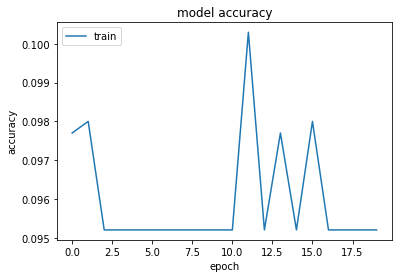

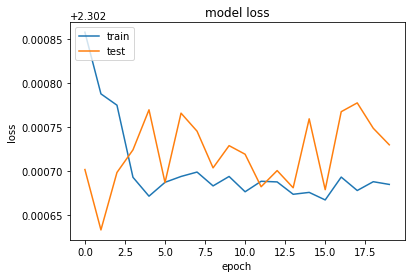

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 30
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_24 (Activation)   (None, 512)              

In [39]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/30
313/313 [==============================] - 51s 160ms/step - loss: 2.3030 - accuracy: 0.0968 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 2/30
313/313 [==============================] - 50s 159ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/30
313/313 [==============================] - 50s 159ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/30
313/313 [==============================] - 51s 162ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/30
313/313 [==============================] - 57s 182ms/step - loss: 2.3026 - accuracy: 0.1033 - val_loss: 2.3026 - val_accuracy: 0.1014
Epoch 6/30
313/313 [==============================] - 57s 181ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/30
313/313 [==============================] - 52s 167ms/step - loss: 2.3026 - accuracy: 0.0965 - val_loss: 2.3027 - val_ac

In [40]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


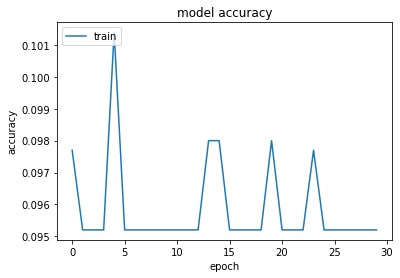

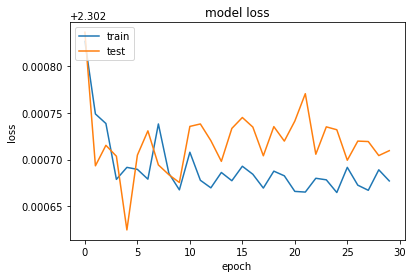

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_27 (Activation)   (None, 512)              

In [43]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
313/313 [==============================] - 54s 170ms/step - loss: 2.3030 - accuracy: 0.0972 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 2/40
313/313 [==============================] - 54s 172ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 3/40
313/313 [==============================] - 54s 173ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 4/40
313/313 [==============================] - 53s 169ms/step - loss: 2.3026 - accuracy: 0.1032 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 5/40
313/313 [==============================] - 54s 172ms/step - loss: 2.3027 - accuracy: 0.1018 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/40
313/313 [==============================] - 66s 211ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 7/40
313/313 [==============================] - 56s 179ms/step - loss: 2.3027 - accuracy: 0.1026 - val_loss: 2.3027 - val_ac

In [44]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


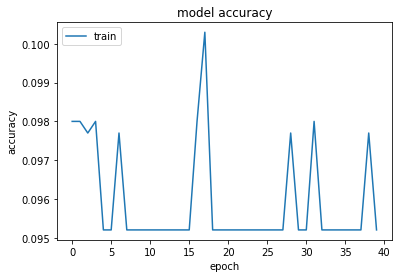

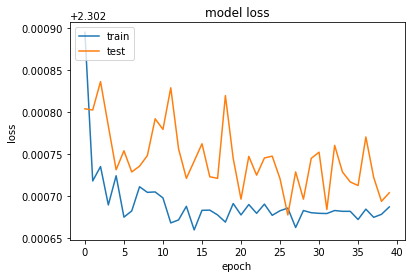

In [45]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 50
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_53 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_54 (Activation)   (None, 512)             

In [78]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
313/313 [==============================] - 60s 185ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 2/50
313/313 [==============================] - 53s 169ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 3/50
313/313 [==============================] - 55s 175ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 4/50
313/313 [==============================] - 55s 175ms/step - loss: 2.3025 - accuracy: 0.1027 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 5/50
313/313 [==============================] - 57s 181ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/50
313/313 [==============================] - 53s 169ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/50
313/313 [==============================] - 58s 185ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3027 - val_ac

In [79]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


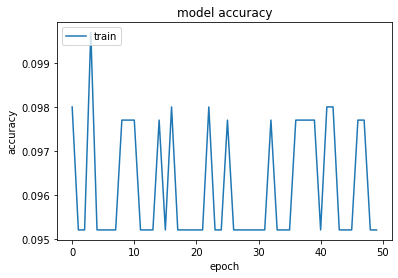

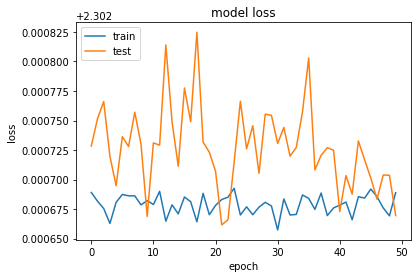

In [80]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* >**Epochs = 2  Test Accuracy = 54.87%**
* >**Epochs = 10 Test Accuracy = 10%**
* >**Epochs = 20 Test Accuracy = 10%** 
* >**Epochs = 30 Test Accuracy = 10%**
* >**Epochs = 40 Test Accuracy = 10%**
* >**Epochs = 50 Test Accuracy = **

**Testing accuracies for different validation splits**

In [81]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.1
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_56 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_57 (Activation)   (None, 512)             

In [82]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
352/352 [==============================] - 57s 159ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 2/2
352/352 [==============================] - 56s 158ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0958
Testing...
79/79 [==============================] - 3s 34ms/step - loss: 2.3026 - accuracy: 0.1000

Test score: 2.3025922775268555
Test accuracy: 0.10000000149011612


In [83]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


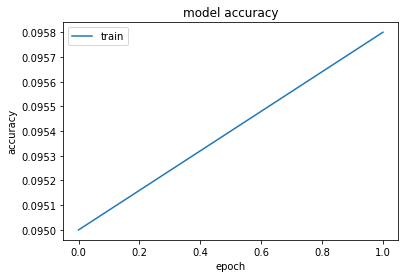

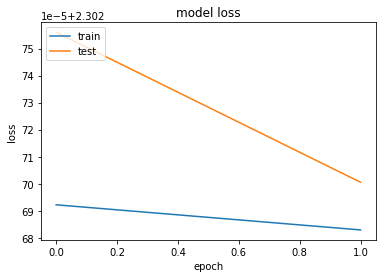

In [84]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.3
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_59 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_60 (Activation)   (None, 512)             

In [86]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
274/274 [==============================] - 47s 167ms/step - loss: 2.3027 - accuracy: 0.0949 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 2/2
274/274 [==============================] - 45s 165ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.0984
Testing...
79/79 [==============================] - 2s 30ms/step - loss: 2.3026 - accuracy: 0.1000

Test score: 2.3026018142700195
Test accuracy: 0.10000000149011612


In [87]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


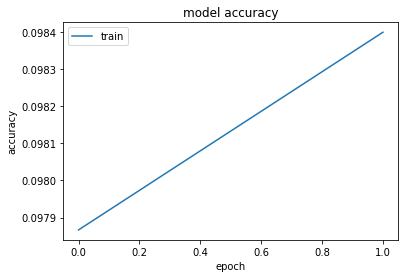

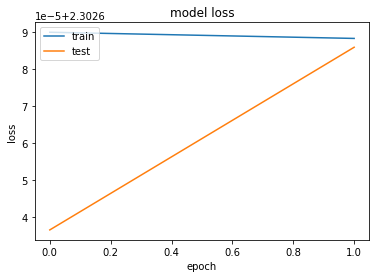

In [88]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.4
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_62 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_63 (Activation)   (None, 512)             

In [90]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
235/235 [==============================] - 40s 167ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 2/2
235/235 [==============================] - 39s 165ms/step - loss: 2.3026 - accuracy: 0.1048 - val_loss: 2.3027 - val_accuracy: 0.0988
Testing...
79/79 [==============================] - 2s 30ms/step - loss: 2.3026 - accuracy: 0.1000

Test score: 2.302614450454712
Test accuracy: 0.10000000149011612


In [91]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


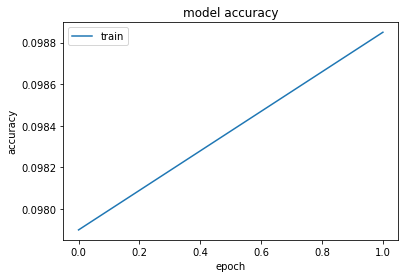

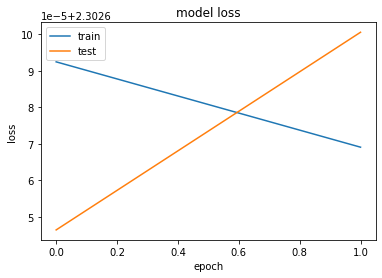

In [92]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* > **Validation_split = 0.1 Test Accuracy =**
* > **Validation_split = 0.2 Test Accuracy =**
* > **Validation_split = 0.3 Test Accuracy =**
* > **Validation_split = 0.4 Test Accuracy =**

**Checking accuracies of different OPTIMs**

In [93]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_65 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_66 (Activation)   (None, 512)             

In [94]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 39s 122ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0952
Epoch 2/2
313/313 [==============================] - 43s 136ms/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.0952
Testing...
79/79 [==============================] - 3s 41ms/step - loss: 2.3026 - accuracy: 0.1000

Test score: 2.302588939666748
Test accuracy: 0.10000000149011612


In [95]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


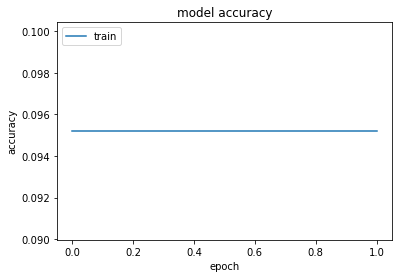

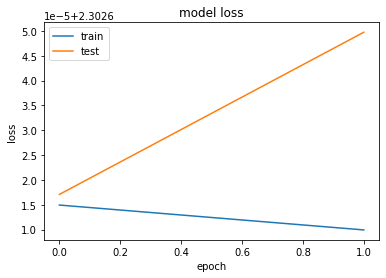

In [96]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [97]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_68 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_69 (Activation)   (None, 512)             

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0955

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 Dropout=0.25,0.5**

* >**RMSprop()**
* >**Adam()**
* >**SGD()**

**Checking accuracies for different Dropout values**

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.9))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = Adam() Dropout=0.25,0.5**

* >**Dropout=0.1 Accuracy=**
* >**Dropout=0.2 Accuracy=**
* >**Dropout=0.25,0.5 Accuracy=**
* >**Dropout=0.3 Accuracy=**
* >**Dropout=0.4 Accuracy=**
* >**Dropout=0.5 Accuracy=**
* >**Dropout=0.6 Accuracy=**
* >**Dropout=0.7 Accuracy=**
* >**Dropout=0.8 Accuracy=**
* >**Dropout=0.9 Accuracy=**

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from __future__ import print_function
import numpy as np 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation, Dropout 
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671)  # for reproducibility

In [ ]:
import tensorflow
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [ ]:
pip install extra-keras-datasets

In [ ]:
from extra_keras_datasets import emnist
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='balanced')